In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Import the fashion images dataset
data = keras.datasets.fashion_mnist

In [7]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [23]:
#60000 training images of size 28x28
print(train_images.shape)
#60000 training labels for the images
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [34]:
#See representation of the first training image
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

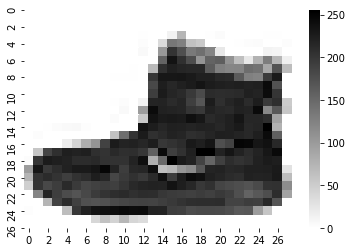

In [35]:
#Visually see the image
sns.heatmap(train_images[0], cmap=plt.cm.binary)
plt.show()

In [36]:
#Normalize the images for faster training and to have it in a small range
train_images = train_images/255 #Values ranged from 0-255 before, now for 0-1
test_images = test_images/255

In [37]:
#See new representation of the first training image
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

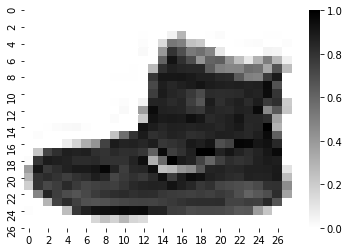

In [38]:
#Visually see the image, values will range from 0-1
sns.heatmap(train_images[0], cmap=plt.cm.binary)
plt.show()

In [32]:
#All of the image labels
print(set(train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [50]:
#Define the model and train
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(89, activation='relu'), #89 units in hidden layer
                         keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.5092 - accuracy: 0.8231
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3785 - accuracy: 0.8648
Epoch 3/5
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3427 - accuracy: 0.8745
Epoch 4/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3196 - accuracy: 0.8829
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3041 - accuracy: 0.8888


In [63]:
#See shape of test images and labels
print(test_images.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


In [51]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3470 - accuracy: 0.8766


In [54]:
#Making predictions
prediction = model.predict(test_images)
print(np.argmax(prediction[0]))

9


In [55]:
#Converting output labels to class labels
class_names = ['T-shirt', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Boots']

In [61]:
#Making predictions using class labels
print(class_names[np.argmax(prediction[0])])

Boots
